In [1]:
import os
import json
import string
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import time

warnings.filterwarnings(action='ignore', message='numpy.dtype size changed')
warnings.filterwarnings(action='ignore', message='compiletime version 3.5 of module')

os.chdir('/Users/tonbadal/PycharmProjects/synthesized')

%load_ext autoreload
%autoreload 2
%matplotlib inline

/Users/tonbadal/PycharmProjects/synthesized/venv/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/tonbadal/PycharmProjects/synthesized/venv/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
from synthesized.testing import synthetic_distributions as syn_dist
from synthesized.testing.evaluate_sparsity_regimes import missing_patterns, synthesize_and_plot_results

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Copyright (C) Synthesized Ltd. - All Rights Reserved
License key: EE6B-6720-67A2-32F3-3139-2D31-322D-B531
Expires at: 2019-12-31 00:00:00


In [4]:
def plot_dist(data: pd.DataFrame, data_missing: pd.DataFrame):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharex=True, sharey=True)
    ax1.set_title('orig')
    ax2.set_title('missing')
    sns.scatterplot(x='x', y='y', data=data, ax=ax1, color=sns.color_palette()[0])
    sns.scatterplot(x='x', y='y', data=data_missing, ax=ax2, color=sns.color_palette()[1])
    plt.show()
    
def plot_heatmap(data1: pd.DataFrame, data2: pd.DataFrame):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharex=True, sharey=True)
    ax1.set_title('orig')
    ax2.set_title('synth')
    
    crosstab1 = pd.crosstab(data1['x'], columns=[data1['y']]).apply(lambda r: r/r.sum(), axis=1)
    sns.heatmap(crosstab1, vmin=0.0, vmax=1.0, ax=ax1)
    
    crosstab2 = pd.crosstab(data2['x'], columns=[data2['y']]).apply(lambda r: r/r.sum(), axis=1)
    sns.heatmap(crosstab2, vmin=0.0, vmax=1.0, ax=ax2)
            

============= MCAR =============
Prop. NaNs:
x    0.5080
y    0.5017
dtype: float64


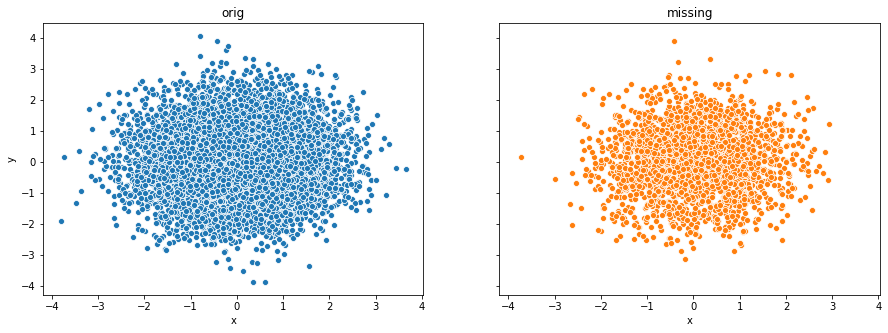

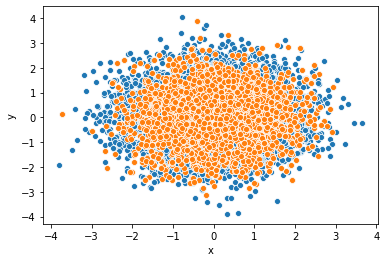

============= MAR =============
Prop. NaNs:
x    0.4999
y    0.4999
dtype: float64


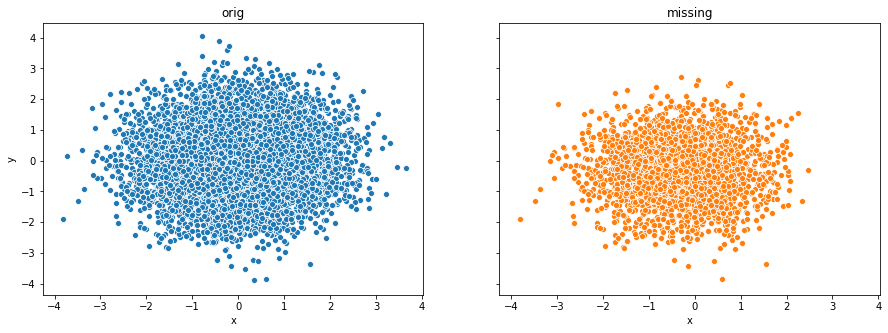

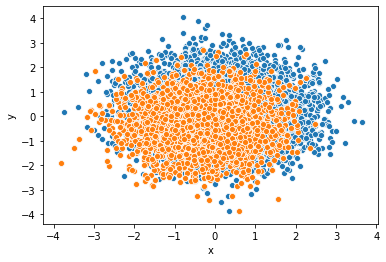

============= MNAR =============
Prop. NaNs:
x    0.4998
y    0.4999
dtype: float64


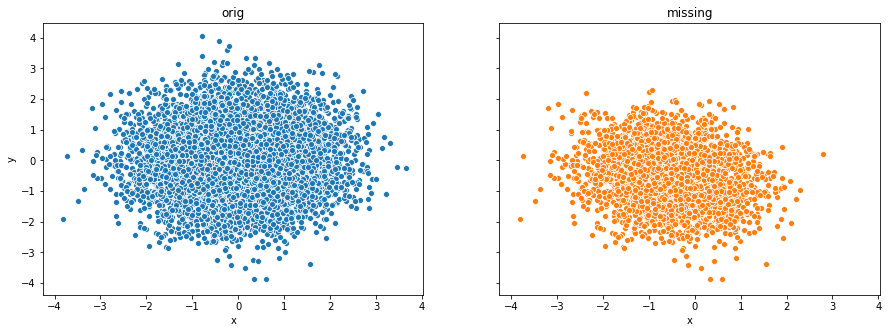

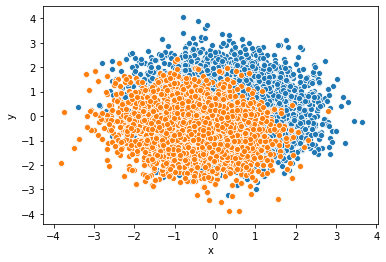

In [5]:
data = syn_dist.create_gauss_ball(x_mean=0, x_std=1, y_mean=0, y_std=1, size=10000)

keep_ratio = 0.5
std_noise = 2.

# MCAR
print('============= MCAR =============')
data_missing = missing_patterns(data, keep_ratio=keep_ratio, mechanism='MCAR')

print('Prop. NaNs:')
print(np.sum(data_missing.isna()) / len(data_missing) )
plot_dist(data, data_missing)

sns.scatterplot(x='x', y='y', data=data, color=sns.color_palette()[0])
sns.scatterplot(x='x', y='y', data=data_missing, color=sns.color_palette()[1])
plt.show()


# MAR
print('============= MAR =============')
data_missing = missing_patterns(data, keep_ratio=keep_ratio, mechanism='MAR', std_noise=std_noise)

print('Prop. NaNs:')
print(np.sum(data_missing.isna()) / len(data_missing) )
plot_dist(data, data_missing)

sns.scatterplot(x='x', y='y', data=data, color=sns.color_palette()[0])
sns.scatterplot(x='x', y='y', data=data_missing, color=sns.color_palette()[1])
plt.show()


# MNAR
print('============= MNAR =============')
data_missing = missing_patterns(data, keep_ratio=keep_ratio, mechanism='MNAR', std_noise=std_noise)

print('Prop. NaNs:')
print(np.sum(data_missing.isna()) / len(data_missing) )
plot_dist(data, data_missing)

sns.scatterplot(x='x', y='y', data=data, color=sns.color_palette()[0])
sns.scatterplot(x='x', y='y', data=data_missing, color=sns.color_palette()[1])
plt.show()

In [6]:
from synthesized.testing import UtilityTesting
from synthesized import HighDimSynthesizer

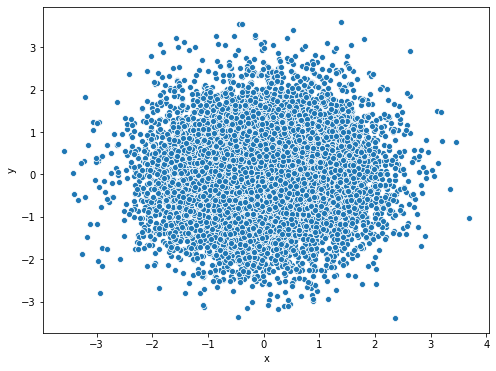

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Computed results for 75% NaNs for MCAR. Took 88.84s.
Computed results for 70% NaNs for MCAR. Took 84.93s.
Computed results for 65% NaNs for MCAR. Took 94.20s.
Computed results for 60% NaNs for MCAR. Took 102.91s.
Computed results for 55% NaNs for MCAR. Took 97.07s.
Computed results for 50% NaNs for MCAR. Took 95.15s.
Computed results for 45% NaNs for MCAR. Took 92.82s.
Computed results for 40% NaNs for MCAR. Took 104.91s.
Computed results for 35% NaNs for MCAR. Took 96.91s.
Computed results for 30% NaNs for MCAR. Took 134.95s.
Computed results for 25% NaNs for MCAR. Took 113.88s.
Computed results for 20% NaNs for MCAR. Took 109.46s.
Computed results for 15% NaNs for MCAR. Took 126.84s.
Computed results for 10% NaNs for MCAR. Took 125.95s.
Computed results for 5% NaNs for MCAR. Took 107.26s.
Computed results for 0% NaNs for MCAR. Took 196.91s.


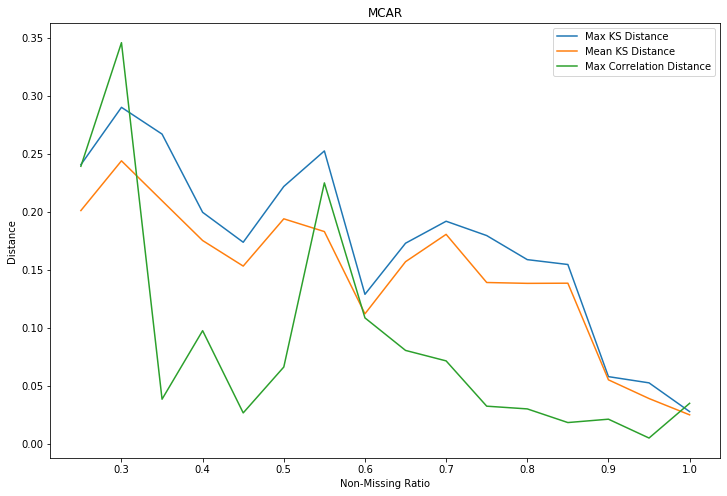

Computed results for 75% NaNs for MAR. Took 95.02s.


In [ ]:
data = syn_dist.create_gauss_ball(x_mean=0, x_std=1, y_mean=0, y_std=1, size=10000)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=data)
plt.show()

results = dict()
for mechanism in ['MCAR', 'MAR', 'MNAR']:
    results[mechanism] = synthesize_and_plot_results(
        data, mechanism, n_iter=2500, std_noise = 2., start=25, end=100, step=5, n_experiments=3
    )


In [ ]:
import pandas as pd
import numpy as np
def create_gauss_ball(x_mean: float,
                      x_std: float,
                      y_mean: float,
                      y_std: float,
                      size: int,
                      cor: float = 0.) -> pd.DataFrame:
    """Creates a two-dimensional (axes: x,y) gauss distribution with params N([x_mean, y_mean], [x_std, y_std])"""
    mean = [x_mean, y_mean]
    cov = [[x_std ** 2, x_std * y_std * cor], [x_std * y_std * cor, y_std ** 2]]
    x, y = np.random.multivariate_normal(mean, cov, size).T
    df = pd.DataFrame({'x': x, 'y': y})
    return df

In [17]:
data = syn_dist.create_gauss_ball(x_mean=0, x_std=1, y_mean=0, y_std=1, size=10000)
data.corr()

,x,y
x,1.000000,-0.002476
y,-0.002476,1.000000
